In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [6]:
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')

In [7]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [8]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
data_fake["class"] = 0
data_true["class"] = 1

In [10]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [11]:
# Take last 10 fake news rows for manual testing
data_fake_manual_testing = data_fake.tail(10)
data_fake = data_fake.iloc[:-10]

# Take last 10 true news rows for manual testing
data_true_manual_testing = data_true.tail(10)
data_true = data_true.iloc[:-10]

In [12]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [13]:
data_fake_manual_testing['class'] = 0
data_true_manual_testing['class'] = 1

In [14]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [15]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [16]:
data_merge = pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [17]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [18]:
data = data_merge.drop(['title', 'subject', 'date'], axis = 1)

In [19]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [20]:
data = data.sample(frac = 1)

In [21]:
data.head()

,text,class
18140,"Thank you, President Trump, for those words o...",0
636,"During his bizarre rally in Youngstown, Ohio...",0
13494,Has anyone else out there just about had it wi...,0
21885,Yeah putting the federal government in charge ...,0
16984,State Reps Forced To Stand Awkwardly In Backgr...,0


In [22]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [23]:
data.columns

Index(['text', 'class'], dtype='object')

In [24]:
data.head()

,text,class
0,"Thank you, President Trump, for those words o...",0
1,"During his bizarre rally in Youngstown, Ohio...",0
2,Has anyone else out there just about had it wi...,0
3,Yeah putting the federal government in charge ...,0
4,State Reps Forced To Stand Awkwardly In Backgr...,0


In [25]:
import re, string

def wordopt(text):
    text = text.lower()                                    # lowercase
    text = re.sub(r'\[.*?\]', '', text)                    # remove things in brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)      # remove urls
    text = re.sub(r'<.*?>+', '', text)                     # remove html tags
    text = re.sub(r'\n', ' ', text)                        # remove line breaks
    text = re.sub(r'\s+', ' ', text).strip()               # remove extra spaces
    return text

In [26]:
data['text'] = data['text'].apply(wordopt)

In [27]:
x = data['text']
y = data['class']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42, stratify = y)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [30]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [31]:
pred_lr = LR.predict(xv_test)

In [32]:
LR.score(xv_test, y_test)

0.9861853832442068

In [33]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5868
           1       0.98      0.99      0.99      5352

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [34]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [35]:
pred_dt = DT.predict(xv_test)

In [36]:
DT.score(xv_test, y_test)

0.9958110516934047

In [37]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5868
           1       1.00      1.00      1.00      5352

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [38]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state = 0)
GB.fit(xv_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [39]:
pred_gb = GB.predict(xv_test)

In [40]:
GB.score(xv_test, y_test)

0.9950980392156863

In [41]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5868
           1       0.99      1.00      0.99      5352

    accuracy                           1.00     11220
   macro avg       0.99      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [42]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
pred_rf = RF.predict(xv_test)

In [44]:
RF.score(xv_test, y_test)

0.9876114081996435

In [45]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5868
           1       0.99      0.99      0.99      5352

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

NB = MultinomialNB()
NB.fit(xv_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [47]:
nb_preds = NB.predict(xv_test)
print("Naive Bayes Performance")
print("Accuracy:", accuracy_score(y_test, nb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_preds))
print("Classification Report:\n", classification_report(y_test, nb_preds))

Naive Bayes Performance
Accuracy: 0.9351158645276292
Confusion Matrix:
 [[5560  308]
 [ 420 4932]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      5868
           1       0.94      0.92      0.93      5352

    accuracy                           0.94     11220
   macro avg       0.94      0.93      0.93     11220
weighted avg       0.94      0.94      0.94     11220



In [48]:
svm_base = LinearSVC(max_iter=10000, random_state=42)
SVM = CalibratedClassifierCV(svm_base)  # wrap to get predict_proba
SVM.fit(xv_train, y_train)

,estimator,LinearSVC(max...ndom_state=42)
,method,'sigmoid'
,cv,None
,n_jobs,None
,ensemble,'auto'
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'


In [49]:
svm_preds = SVM.predict(xv_test)

print("\nLinear SVM Performance")
print("Accuracy:", accuracy_score(y_test, svm_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_preds))
print("Classification Report:\n", classification_report(y_test, svm_preds))


Linear SVM Performance
Accuracy: 0.9945632798573975
Confusion Matrix:
 [[5834   34]
 [  27 5325]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      5868
           1       0.99      0.99      0.99      5352

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220




Training Logistic Regression ...

Training Decision Tree ...

Training Random Forest ...

Training Gradient Boosting ...

Training Naive Bayes ...

Training Linear SVM ...

Model Comparison Results:

                 Model  Accuracy  Precision (Real)  Recall (Real)  \
1        Decision Tree    0.9961            0.9961         0.9957   
3    Gradient Boosting    0.9952            0.9918         0.9981   
5           Linear SVM    0.9946            0.9937         0.9950   
2        Random Forest    0.9896            0.9908         0.9873   
0  Logistic Regression    0.9862            0.9831         0.9880   
4          Naive Bayes    0.9351            0.9412         0.9215   

   F1-score (Real)  ROC-AUC  
1           0.9959   0.9960  
3           0.9950   0.9992  
5           0.9943   0.9996  
2           0.9891   0.9991  
0           0.9856   0.9985  
4           0.9313   0.9798  

Logistic Regression - Confusion Matrix:
[[5777   91]
 [  64 5288]]

Decision Tree - Confusion Matrix:
[[

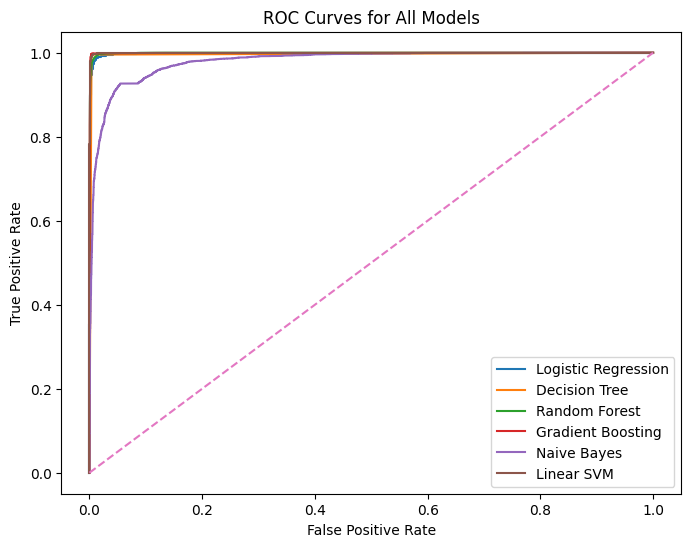

In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# ------------------------------
# Define models
# ------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": CalibratedClassifierCV(LinearSVC(max_iter=10000, random_state=42))
}

results = []
trained = {}

# ------------------------------
# Train & evaluate each model
# ------------------------------
for name, model in models.items():
    print(f"\nTraining {name} ...")
    model.fit(xv_train, y_train)
    trained[name] = model
    
    preds = model.predict(xv_test)
    acc = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds, output_dict=True, zero_division=0)
    cm = confusion_matrix(y_test, preds)

    # Compute ROC-AUC if possible
    try:
        probs = model.predict_proba(xv_test)[:, 1]
        auc = roc_auc_score(y_test, probs)
    except:
        try:
            scores = model.decision_function(xv_test)
            auc = roc_auc_score(y_test, scores)
        except:
            auc = None

    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision (Real)": round(report['1']['precision'], 4),
        "Recall (Real)": round(report['1']['recall'], 4),
        "F1-score (Real)": round(report['1']['f1-score'], 4),
        "ROC-AUC": round(auc, 4) if auc is not None else "N/A"
    })

# ------------------------------
# Results Table
# ------------------------------
df_results = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nModel Comparison Results:\n")
print(df_results)

# ------------------------------
# Confusion Matrices
# ------------------------------
for name, model in trained.items():
    preds = model.predict(xv_test)
    cm = confusion_matrix(y_test, preds)
    print(f"\n{name} - Confusion Matrix:\n{cm}")

# ------------------------------
# ROC Curves
# ------------------------------
plt.figure(figsize=(8, 6))
for name, model in trained.items():
    try:
        probs = model.predict_proba(xv_test)[:, 1]
    except:
        try:
            probs = model.decision_function(xv_test)
        except:
            continue
    fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=name)

plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend()
plt.show()


In [51]:
def predict_news(news):
    news = wordopt(news)
    vectorized = vectorization.transform([news])
    prediction = SVM.predict(vectorized)[0]
    prob = SVM.predict_proba(vectorized)[0]
    return f"{'Fake' if prediction == 0 else 'Real'} (Confidence: {max(prob)*100:.2f}%)"

# Try with your manual test set
print(predict_news("Donald Trump wins the election again in 2024!"))
print(predict_news("NASA announces new evidence of water on Mars."))

Fake (Confidence: 87.94%)
Fake (Confidence: 89.47%)


In [52]:
for text in data_fake_manual_testing['text']:
    print("Fake Test →", predict_news(text))

for text in data_true_manual_testing['text']:
    print("True Test →", predict_news(text))

Fake Test → Fake (Confidence: 99.89%)
Fake Test → Fake (Confidence: 100.00%)
Fake Test → Fake (Confidence: 100.00%)
Fake Test → Fake (Confidence: 99.88%)
Fake Test → Fake (Confidence: 99.98%)
Fake Test → Fake (Confidence: 100.00%)
Fake Test → Fake (Confidence: 99.99%)
Fake Test → Fake (Confidence: 99.84%)
Fake Test → Fake (Confidence: 100.00%)
Fake Test → Fake (Confidence: 99.99%)
True Test → Real (Confidence: 99.22%)
True Test → Real (Confidence: 99.99%)
True Test → Real (Confidence: 99.23%)
True Test → Real (Confidence: 99.91%)
True Test → Real (Confidence: 97.64%)
True Test → Real (Confidence: 100.00%)
True Test → Real (Confidence: 99.90%)
True Test → Real (Confidence: 99.31%)
True Test → Real (Confidence: 99.99%)
True Test → Real (Confidence: 100.00%)


In [53]:
import joblib
import os

# Create a folder for models if not exists
os.makedirs("models", exist_ok=True)

# Save each trained model
for name, model in trained.items():
    filename = f"models/{name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(model, filename)
    print(f"Saved: {filename}")

# Save vectorizer separately
joblib.dump(vectorization, "models/vectorizer.pkl")
print("Saved: vectorizer.pkl")


Saved: models/logistic_regression_model.pkl
Saved: models/decision_tree_model.pkl
Saved: models/random_forest_model.pkl
Saved: models/gradient_boosting_model.pkl
Saved: models/naive_bayes_model.pkl
Saved: models/linear_svm_model.pkl
Saved: vectorizer.pkl


In [54]:
def load_model(model_name):
    """
    Load a saved model and vectorizer, and return a predict function.
    
    model_name: str
        One of: "decision_tree", "linear_svm", "naive_bayes",
                "logistic_regression", "random_forest", "gradient_boosting"
    """
    # Paths
    model_path = f"models/{model_name}_model.pkl"
    vectorizer_path = "saved_models/vectorizer.pkl"
    
    # Load model + vectorizer
    model = joblib.load(model_path)
    vectorizer = joblib.load(vectorizer_path)
    
    print(f"✅ Loaded model: {model_name}")
    
    # Define prediction helper
    def predict(text):
        # Preprocess (minimal lowercase + strip)
        text_clean = str(text).lower().strip()
        vect = vectorizer.transform([text_clean])
        
        # Prediction
        pred = model.predict(vect)[0]
        label = "Real" if pred == 1 else "Fake"
        
        # Confidence (if available)
        conf = None
        if hasattr(model, "predict_proba"):
            conf = model.predict_proba(vect)[0].max()
        elif hasattr(model, "decision_function"):
            score = model.decision_function(vect)
            conf = 1 / (1 + np.exp(-score))[0]  # sigmoid on decision score
        
        return {
            "label": label,
            "confidence": round(float(conf), 4) if conf is not None else "N/A"
        }
    
    return model, vectorizer, predict


In [55]:
joblib.dump(trained["Linear SVM"], "models/final_linear_svm.pkl")
joblib.dump(vectorization, "models/final_vectorizer.pkl")

print("✅ Files saved in:", os.path.abspath("models"))

✅ Files saved in: D:\ML Projects\FND\models


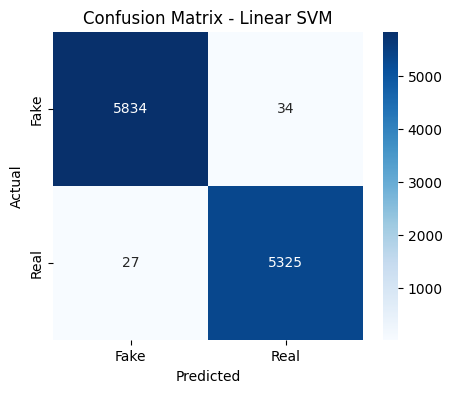

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      5868
           1       0.99      0.99      0.99      5352

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



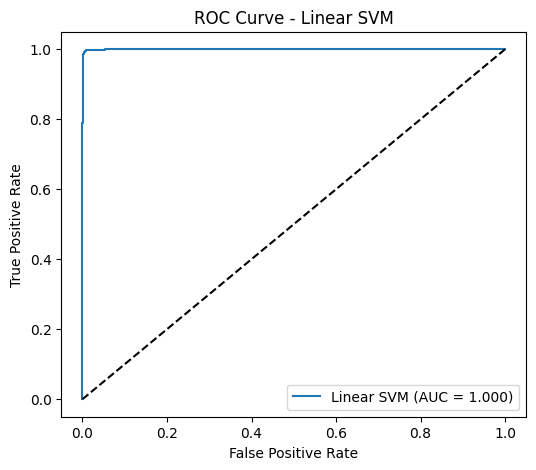

In [56]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Predictions
y_pred = trained["Linear SVM"].predict(xv_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Fake","Real"], yticklabels=["Fake","Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Linear SVM")
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC curve
probs = trained["Linear SVM"].predict_proba(xv_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Linear SVM (AUC = {auc:.3f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Linear SVM")
plt.legend()
plt.show()

In [57]:
import numpy as np

feature_names = vectorization.get_feature_names_out()

# Access one of the inner SVM estimators from CalibratedClassifierCV
svm_estimator = trained["Linear SVM"].calibrated_classifiers_[0].estimator

# Get coefficients
weights = svm_estimator.coef_[0]

# Top 20 Fake words (negative weights)
top_fake = np.argsort(weights)[:20]
# Top 20 Real words (positive weights)
top_real = np.argsort(weights)[-20:]

print("🔴 Top words predicting Fake:")
for i in top_fake:
    print(feature_names[i], round(weights[i],4))

print("\n🟢 Top words predicting Real:")
for i in top_real[::-1]:
    print(feature_names[i], round(weights[i],4))

🔴 Top words predicting Fake:
via -6.6147
us -3.1247
read -3.1007
gop -2.6324
just -2.6209
this -2.414
mr -2.4004
sen -2.3781
featured -2.2405
image -2.234
rep -2.0862
watch -1.9561
com -1.9505
hillary -1.7896
getty -1.7834
daily -1.7071
these -1.6986
even -1.6943
obama -1.6747
pic -1.6503

🟢 Top words predicting Real:
reuters 16.0379
said 6.8435
on 3.8644
washington 2.6131
nov 2.3657
wednesday 2.1107
republican 1.8341
thursday 1.7704
in 1.7677
saying 1.7589
tuesday 1.7361
ly 1.615
reporters 1.5904
bit 1.5554
comment 1.5206
showed 1.487
had 1.4692
presidential 1.379
minister 1.3622
of 1.3426


In [58]:
def predict_news_svm(text):
    cleaned = wordopt(text)
    vect = vectorization.transform([cleaned])
    pred = trained["Linear SVM"].predict(vect)[0]
    conf = trained["Linear SVM"].predict_proba(vect)[0].max()
    label = "Real" if pred == 1 else "Fake"
    return {"label": label, "confidence": round(float(conf), 4)}


In [59]:
print(predict_news_svm("Donald Trump wins the election again in 2024!"))
print(predict_news_svm("NASA announces new evidence of water on Mars."))

{'label': 'Fake', 'confidence': 0.8794}
{'label': 'Fake', 'confidence': 0.8947}


In [60]:
pip install flask

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


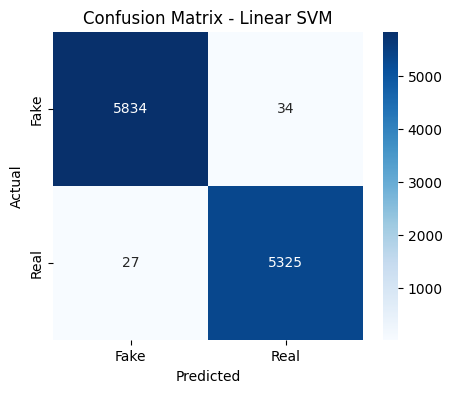

              precision    recall  f1-score   support

        Fake       1.00      0.99      0.99      5868
        Real       0.99      0.99      0.99      5352

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predictions on test set
y_pred = trained["Linear SVM"].predict(xv_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Fake","Real"], yticklabels=["Fake","Real"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Linear SVM")
plt.show()

# Print detailed classification report
print(classification_report(y_test, y_pred, target_names=["Fake","Real"]))

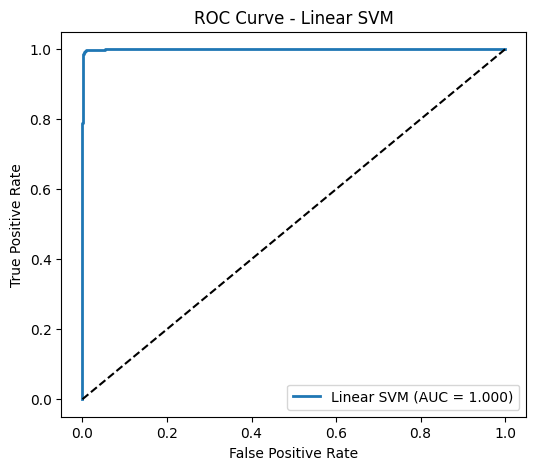

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities (Real = class 1)
probs = trained["Linear SVM"].predict_proba(xv_test)[:,1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Linear SVM (AUC = {auc:.3f})", linewidth=2)
plt.plot([0,1],[0,1],'k--')  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Linear SVM")
plt.legend()
plt.show()


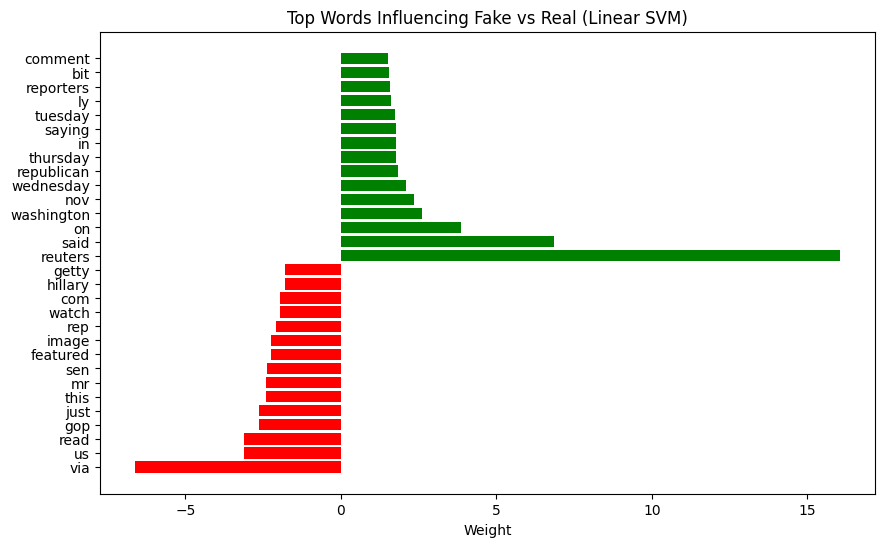

In [63]:
import numpy as np

# Access inner SVM model from CalibratedClassifierCV
svm_estimator = trained["Linear SVM"].calibrated_classifiers_[0].estimator
weights = svm_estimator.coef_[0]
feature_names = vectorization.get_feature_names_out()

# Top 15 Fake & Real words
top_fake_idx = np.argsort(weights)[:15]
top_real_idx = np.argsort(weights)[-15:]

top_fake_words = [(feature_names[i], weights[i]) for i in top_fake_idx]
top_real_words = [(feature_names[i], weights[i]) for i in top_real_idx]

# Combine for plotting
words = [w for w, _ in top_fake_words] + [w for w, _ in top_real_words[::-1]]
scores = [s for _, s in top_fake_words] + [s for _, s in top_real_words[::-1]]
colors = ["red"]*len(top_fake_words) + ["green"]*len(top_real_words)

# Plot
plt.figure(figsize=(10,6))
plt.barh(words, scores, color=colors)
plt.xlabel("Weight")
plt.title("Top Words Influencing Fake vs Real (Linear SVM)")
plt.show()
